So today, I'm going to use the techniques I learnt yesterday and put them to this dataset

In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


# EDA

In [55]:
df = pd.read_csv("/kaggle/input/housedata/data.csv")

In [56]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


House price is most likely dependant to it's location, let's check the location

In [57]:
df.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Tukwila                  29
Vashon                   29
SeaTac                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Fall City                11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific             

It seems this feature would be useful, how about country?

In [58]:
df.country.value_counts()


USA    4600
Name: country, dtype: int64

Since all of the houses are in USA, that column is completely useless, it will be dropped later

Let's inspect the street

In [62]:
df.street.value_counts()

2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
7490 85th Ave SE         2
23620 SE 243rd Pl        2
2358 Fairview Ave E      2
                        ..
18460 SE 143rd St        1
15965 176th Ave NE       1
10515 Ashworth Ave N     1
214-220 N St NE          1
31711 7th Pl S           1
Name: street, Length: 4525, dtype: int64

Almost every row have different street, but it might be different if we delete the number

In [51]:
df.street = df.street.apply(lambda x: ' '.join(x.split(' ')[1:]))

In [53]:
df.street.value_counts()

41st Ave SW       11
Ashworth Ave N    11
36th Ave SW       11
35th Ave SW       11
37th Ave SW       11
                  ..
NE 50th St         1
SE 275th Pl        1
271st Ave SE       1
124th Ave NE       1
100th Ave NE       1
Name: street, Length: 2608, dtype: int64

Still 2600+ different values, but it can be more useful now

How about statezip?

In [7]:
df.statezip.value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

77 values, it will be useful

In [8]:
df.date = df.date.apply(lambda x: pd.to_datetime(x.split(' ')[0], format='%Y-%m-%d'))

In [9]:
df['year'] = df.date.dt.year
df.year.value_counts()

2014    4600
Name: year, dtype: int64

In [10]:
df['month'] = df.date.dt.month
df.month.value_counts()

6    2179
5    1768
7     653
Name: month, dtype: int64

In [11]:
df.yr_renovated

0       2005
1          0
2          0
3          0
4       1992
        ... 
4595    1979
4596    2009
4597       0
4598       0
4599       0
Name: yr_renovated, Length: 4600, dtype: int64

In [12]:
df.yr_renovated = df[["yr_built", "yr_renovated"]].max(axis=1)

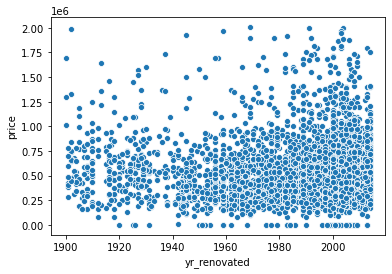

In [13]:
sns.scatterplot(x="yr_renovated", y="price", data=df[df["price"]  <= df["price"].quantile(.99)])

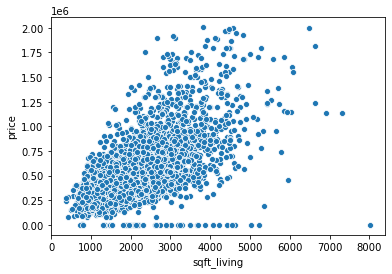

In [14]:
sns.scatterplot(x="sqft_living", y="price", data=df[df.price <= df.price.quantile(.99)])

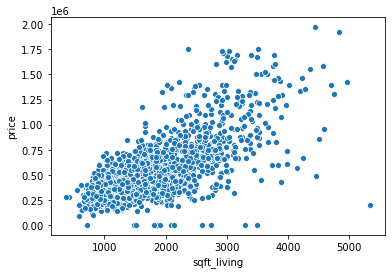

In [15]:
df_seattle = df[df.city == "Seattle"]
sns.scatterplot(x="sqft_living", y="price", data=df_seattle[df_seattle.price <= df_seattle.price.quantile(.99)])

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.city = le.fit_transform(df[["city"]])
df.statezip = le.fit_transform(df["statezip"])


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [17]:
df.drop(["street", "date", "country", "year"],axis = 1, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   int64  
 14  statezip       4600 non-null   int64  
 15  month          4600 non-null   int64  
dtypes: float64(4), int64(12)
memory usage: 575.1 KB


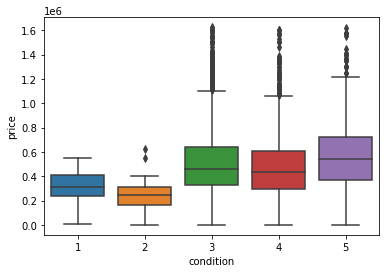

In [19]:
sns.boxplot(x="condition", y="price", data=df[df.price<=df.price.quantile(.98)])

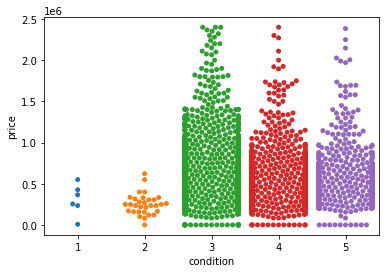

In [20]:
sns.swarmplot(x="condition", y="price", data=df[df.price<=df.price.quantile(.995)])

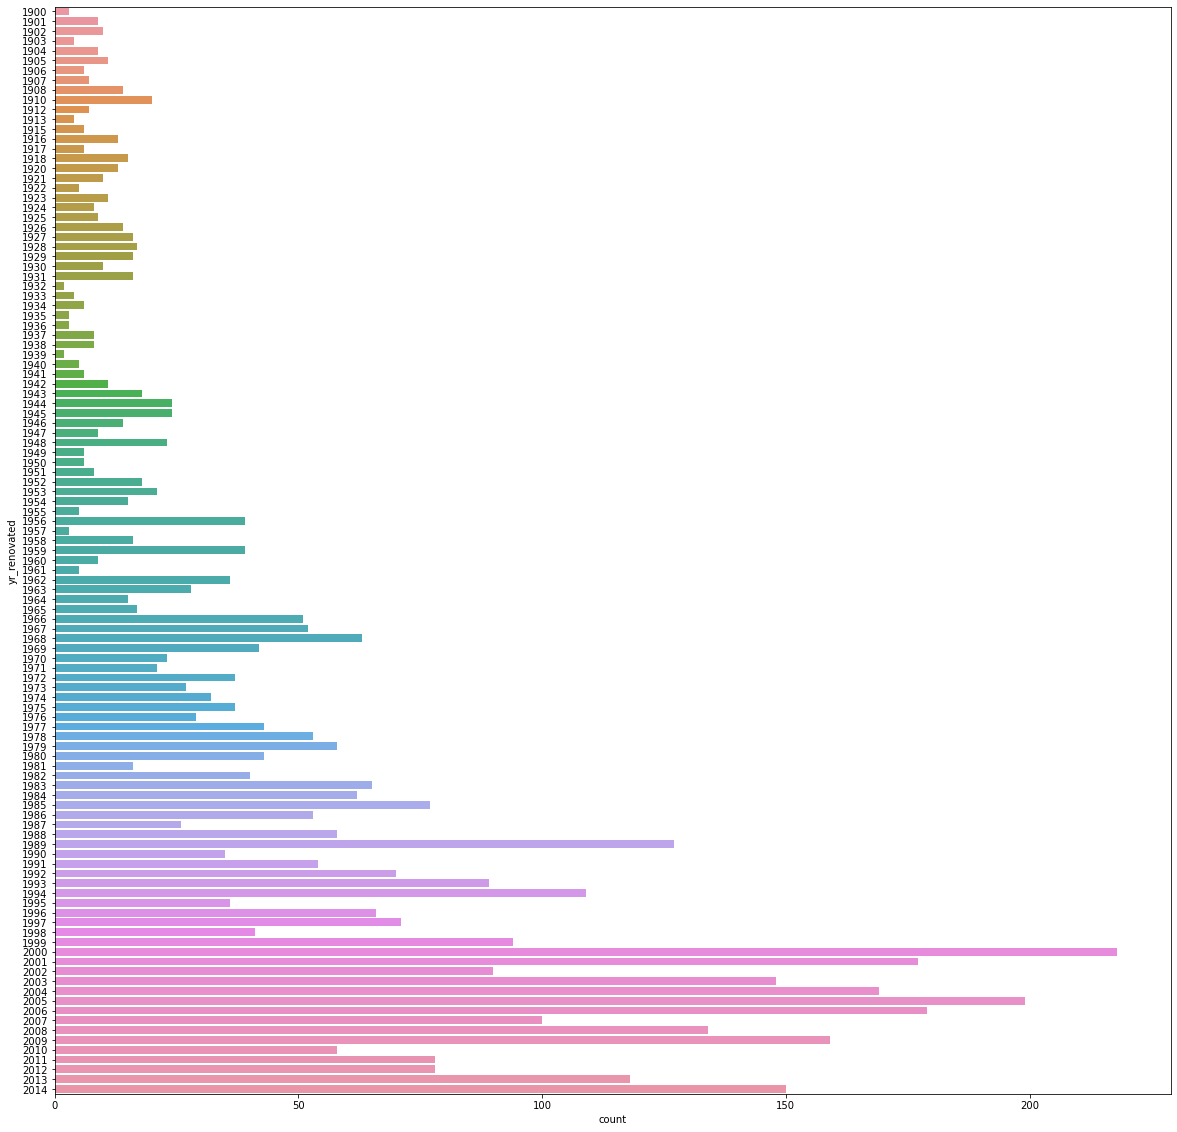

In [21]:
plt.figure(figsize=(20,20))
sns.countplot(y=df["yr_renovated"])

# ax = sns.scatterplot(x = df.groupby("last_renov").count().index, y = 'view', data = df.groupby("last_renov").count())
# ax.set_ylabel("count")

In [22]:
df=df[(df.price >= df.price.quantile(.005)) & (df.price <= df.price.quantile(.995)) ]

In [23]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,month
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,62,5
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,1921,35,58,5
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,1966,18,26,5
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,1963,3,7,5
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,31,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35,62,7
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3,6,7
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,2009,32,37,7
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,1974,35,71,7


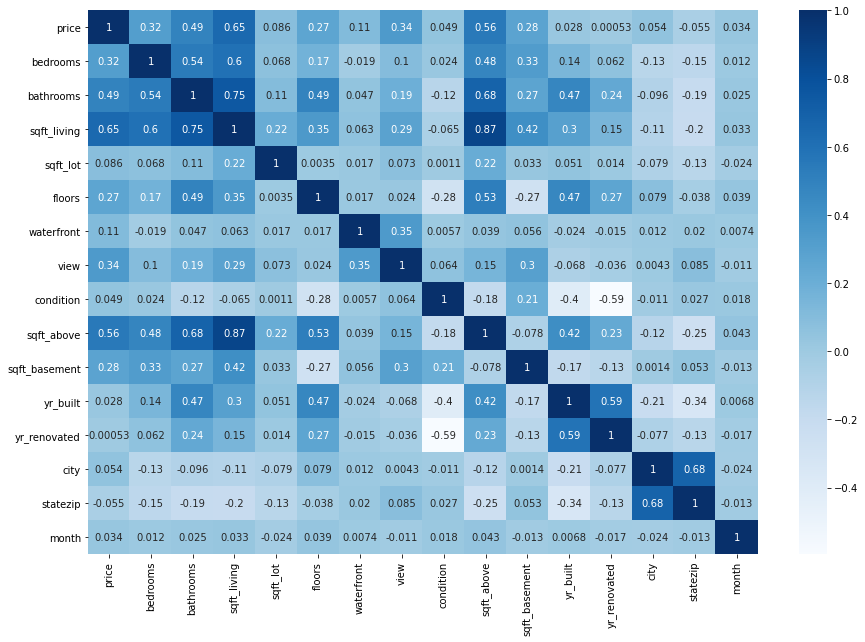

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

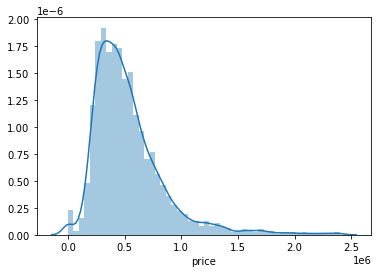

In [25]:
sns.distplot(df.price)
plt.show()

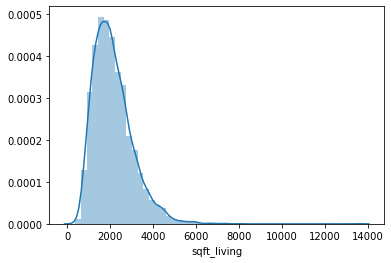

In [26]:
sns.distplot(df.sqft_living)

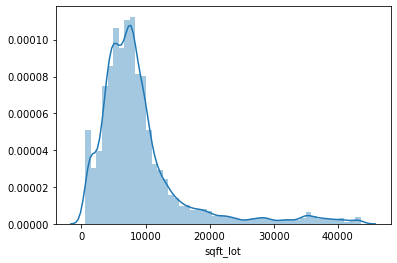

In [27]:
sns.distplot(df[df.sqft_lot <= df.sqft_lot.quantile(.95)].sqft_lot)

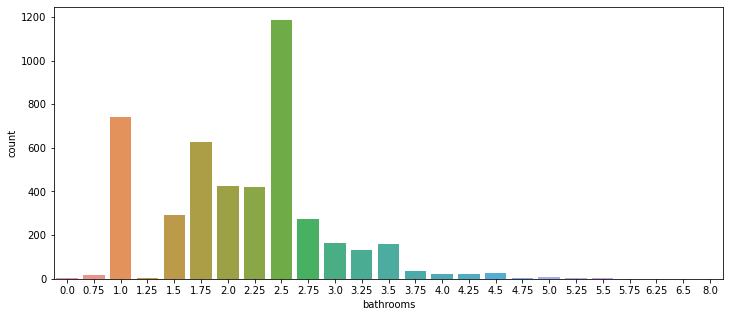

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(df.bathrooms)

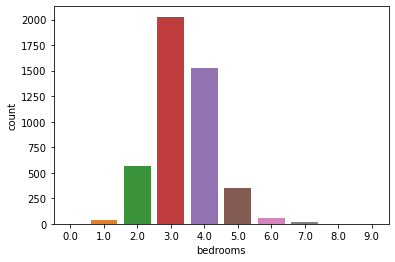

In [29]:
sns.countplot(df.bedrooms)

In [30]:
# df = df.iloc[:,0:11]

There're features with string!!, I have no idea how to deal with it

In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline

col_trans = make_column_transformer(
        (OneHotEncoder(handle_unknown = 'ignore'), ["waterfront", "view", "condition", "city", "statezip"]),
        (StandardScaler(), ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement"]),
        remainder = "passthrough"
)

In [32]:
from sklearn.model_selection import train_test_split
X = df.drop("price", axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:

from sklearn.linear_model import LinearRegression
linR = LinearRegression()
pipe = make_pipeline(col_trans, linR)

pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront', 'view',
                                                   'condition', 'city',
                                                   'statezip']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement'])])),
                ('linearregression', LinearRegression())])

In [34]:
print("Mean Absolute Error: %f" %(np.abs(pipe.predict(X_test) - y_test).mean()))


Mean Absolute Error: 101832.088720


In [35]:
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam
from keras.metrics import MeanAbsoluteError as mae

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# early_stop = EarlyStopping(patience=20, verbose=1, monitor='val_accuracy', mode='max')

In [36]:
model = Sequential()

model.add(Dense(32))
model.add(Dense(64))
model.add(Dense(128))
model.add(Dense(1))

model.compile(optimizer = Adam(1e-4),
             loss = "mean_absolute_error",
#              metrics = [mae]
)

In [37]:
early_stop = EarlyStopping(patience=10, verbose=1, monitor='mean_absolute_error', mode='min')

In [38]:

history = model.fit(
        X_train,
        y_train,
        epochs = 200,
        callbacks=[early_stop],
        validation_split=0.2,
        verbose = 0
    
)

In [39]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 0s 1ms/step - loss: 174902.7969


174902.796875